# Сборный проект
### Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».



## Описание наименований столбцов
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы долларов)
* EU_sales — продажи в Европе (миллионы долларов)
* JP_sales — продажи в Японии (миллионы долларов)
* Other_sales — продажи в других странах (миллионы долларов)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## 1. Открываем файл, изучаем общую информацию.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net//datasets/games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.isna().sum().sort_values()

Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Name                  2
Genre                 2
Year_of_Release     269
User_Score         6701
Rating             6766
Critic_Score       8578
dtype: int64

**Вывод:** 
*   В шести столбцах есть пропущенные значения.
*   Некорректные типы данных
*   Название столбцов с заглавных букв и неоднородны.

## 2.  Предобработка данных

In [6]:
df.duplicated().sum() # явных дубликатов нет

0

Приведу столбцы к нижнему регистру.

In [7]:
df.columns = df.columns.str.lower()
df.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15383,Paragon,PS4,2016.0,Action,0.02,0.0,0.0,0.0,NaN,6.1,NaN


Посмотрим на пропущенные значения в жанре и названии игры.

In [8]:
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
df[df['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


*   Столбец name отвечает за название игры. Оставить его не заполненным нельзя, заполнить медианными или средними значениями также невозможно. Возможно пропуски связаны с тем что его просто не заполнили или у игры на тот момент не было названия. Эти пропуски так же как и пропуски жанра, просто удалю. Думаю что они имеют одни причины появления, и они идентичны.

In [10]:
df = df.dropna(subset=['name', 'genre'])

* В столбце year_of_release (год релиза) есть год в названии игры, если заполнять годами (медианами, средними) которые не соответствуют годам в названии это не совсем логично и будет вызывать вопросы. Пропуск в данном столбце мог возникнуть из-за того, что при заполнении данных об игре забыли указать год или точная дата выхода игры точно не определена. Просто удалю и эти пропуски.

In [11]:
df = df.dropna(subset=['year_of_release'])

* Поменяю тип данных столбца year_of_release с float на int. Для удобства чтения и анализа.

In [12]:
df['year_of_release'] = df['year_of_release'].astype(int)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [13]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Помимо NaN  по полю user_score имеем строку 'tbd'

In [14]:
df[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


* Аббревиатура не скрывает в себе никаких таинственных смыслов и расшифровывается очень просто - To Be Determined, то есть "Будет определено". Что в принципе логично отметить как NaN. Заменю все 'tbd' на NaN. И поменяю тип данных на float, так как столбец по описанию должен содержать оценку пользователей.

In [15]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN).astype(float)

Осталось приглядеться к полю rating.

In [16]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

* Поле rating имеет тип данных object с буквенно-цифровыми обозначениями и приводить его к другим типам не логично, можно поменять значения на что-то более понятное, согласно объяснениям возрастных рейтингов ESRB.
* Возрастные рейтинги также сопровождаются описаниями, которые указывают, что может содержать контент видеоигры, например ненормативную лексику, страх и насилие. Но здесь я это прописывать не буду, ограничусь категориями.
* Только заменю NaN на категорию 'Неопределен'
'K-A' как я понял это сейчас 'E10+' поэтому им присвоил 'Подходит для лиц старше 10 лет'

In [17]:
mapping = {'E': 'Подходит для всех возрастных категорий',
           np.nan: 'Неопределен',
           'M': 'Подходит для лиц старше 17 лет',
           'T': 'Подходит для лиц старше 13 лет',
           'E10+': 'Подходит для лиц старше 10 лет',
           'K-A': 'Подходит для лиц старше 10 лет',
           'AO': 'Подходит для взрослых старше 18 лет',
           'EC': 'Для детей младшего возраста',
           'RP': 'Категория ещё не присвоена'
          }
df['rating'] = df['rating'].replace(mapping)


In [18]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,Подходит для всех возрастных категорий
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Неопределен
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,Подходит для всех возрастных категорий
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,Подходит для всех возрастных категорий
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Неопределен


Пропуски по полям critic_score, user_score тоже нельзя заполнить средними значениями их очень много и такие заполнения могут исказить анализ. Возможно какие-то индикаторные значения будут для нас более уместны. Заменю Nan на -1

In [19]:
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Отдельный столбец с суммой продаж по всем регионам 'sales_total'

In [20]:
summ = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
df['sales_total'] = df[summ].sum(axis= 1) 
df.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
6095,International Superstar Soccer,SNES,1994,Sports,0.0,0.0,0.28,0.0,-1.0,-1.0,Неопределен,0.28


### Вывод
* Переименовали столбцы для лучшей читаемости.
* Проверили датафрейм на дубликаты
* Удалили строки не имеющие название и жанр, они были идентичны
* Привели данные к нужным для анализа типам
* Поменяли NaN  на индикаторное значение -1
* Разобрались с аббревиатурами 'tbd' и ESRB.
Теперь датафрейм не имеет пропусков очистен от треша и готов к дальнейшему анализу.

In [21]:
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  sales_total      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

## 3. Исследовательский анализ данных

Text(0, 0.5, 'Number of Games')

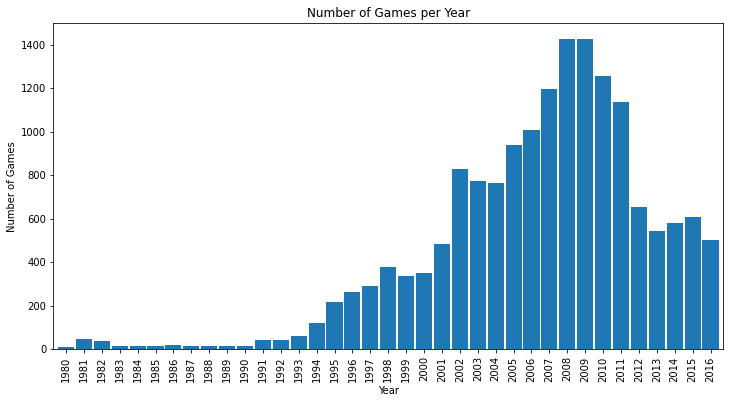

In [22]:
game_counts_by_year = df.groupby('year_of_release')['name'].count()
game_counts_by_year.plot(kind='bar', figsize=(12, 6), width = 0.9)
plt.title('Number of Games per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')

До 1994 года игры выпускались очень сильно ограничено(как наверно и платформы для игры) а потом начался рост пик которого пришелся на 2008 -2009 год. Потом начался некоторый спад, связанный с бурным развитием социальных сетей, мобильных телефонов у которых свои операционные системы и игры под них здесь в этом датасете не представлены(думаю они отжали приличную долю рынка). По этому до 1994 года нет смысла что-то учитывать.

Text(0, 0.5, 'Platform')

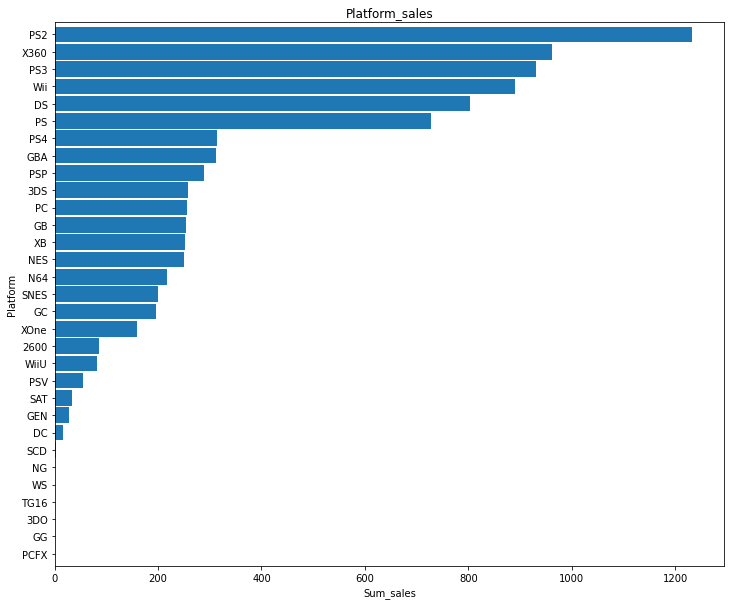

In [23]:
platform_sales = df.groupby('platform')['sales_total'].sum().sort_values()
platform_sales.plot(kind='barh', figsize=(12, 10), width = 0.9)
plt.title('Platform_sales')
plt.xlabel('Sum_sales')
plt.ylabel('Platform')

Лидер PS2, потом XBOX 360 и опять PS только 3 версии, все видно на графике. Только после 6 места есть приличный провал, где продажи заметно ниже, среди них как и новые выпуски платформ, которые еще наберут популярность и продажи, так и мало известные бренды.

In [24]:
top_platforms = platform_sales.sort_values(ascending=False).head(6)

Text(0, 0.5, 'Total Sales')

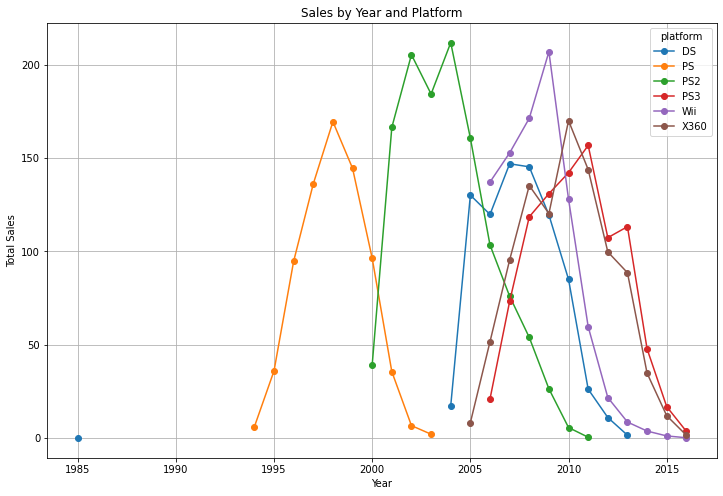

In [25]:
# Список платформ для анализа
platforms = top_platforms.index.tolist()

# Группируем данные по годам и платформам
platform_sales_by_year = df[df['platform'].isin(platforms)].groupby(['year_of_release', 'platform'])['sales_total'].sum().unstack()

# Строим график
platform_sales_by_year.plot(kind='line', figsize=(12, 8), marker='o', grid=True)
plt.title('Sales by Year and Platform')
plt.xlabel('Year')
plt.ylabel('Total Sales')

In [26]:
df[(df['year_of_release']== 1985) & (df['platform'] == 'DS')] # Явный артефакт платформа вышла в 2004 году

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1.0,-1.0,Неопределен,0.02


In [27]:
df = df.drop(index= 15957 )

Text(0, 0.5, 'Total Sales')

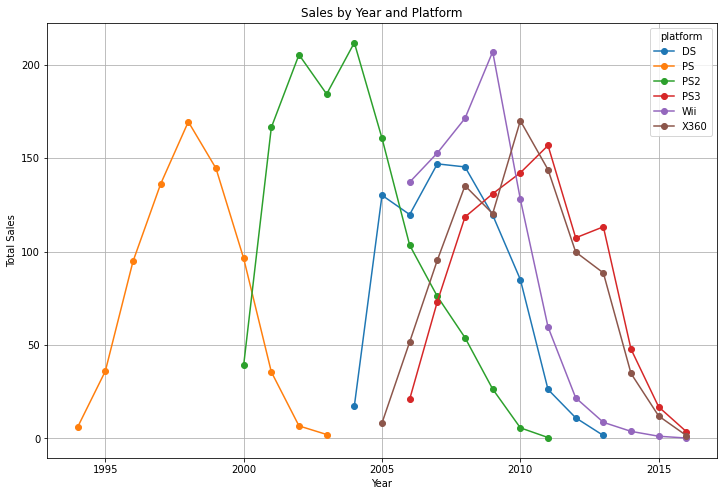

In [28]:
# Список платформ для анализа
platforms = top_platforms.index.tolist()

# Группируем данные по годам и платформам
platform_sales_by_year = df[df['platform'].isin(platforms)].groupby(['year_of_release', 'platform'])['sales_total'].sum().unstack()

# Строим график
platform_sales_by_year.plot(kind='line', figsize=(12, 8), marker='o', grid=True)
plt.title('Sales by Year and Platform')
plt.xlabel('Year')
plt.ylabel('Total Sales')

* DS - Консоль была выпущена в 2004 году в Канаде, США и Японии(поэтому артефакт с 1985 годом удалил). C 2004 года популярность стала расти, пик в 2008 и к 2013 году умирает. Активность 8 лет;

* PS - прожила с 1994 года до 2003, почти 10 лет;

* PS2 - с 2000 до 2011 года - 11 лет;

* PS3 - с 2006 начала сильно сдавать позиции с выходом в 2013 году PS4;

* Wii - с 2006 по 2016, 10 лет дальше данных нет, но наверняка она теряла позиции и изживала себя. Вывод:среднем консоль живет 10 лет. И где-то в этих промежутках от 5 до 7 лет, на определённом спаде, релизят новые версии. Ну или смерть без продолжения в потомках.

In [29]:
actual_time = df.query('year_of_release >= 2012') # только строки, в которых год релиза игры больше или равен 2012 году

In [30]:
# Создаю сводную таблицу , в которой суммируются продажи по каждой платформе для каждого года релиза игры
actual_platform_sales_by_year = actual_time.groupby(['year_of_release', 'platform'])['sales_total'].sum().unstack() 
actual_platform_sales_by_year

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Text(0, 0.5, 'Total Sales')

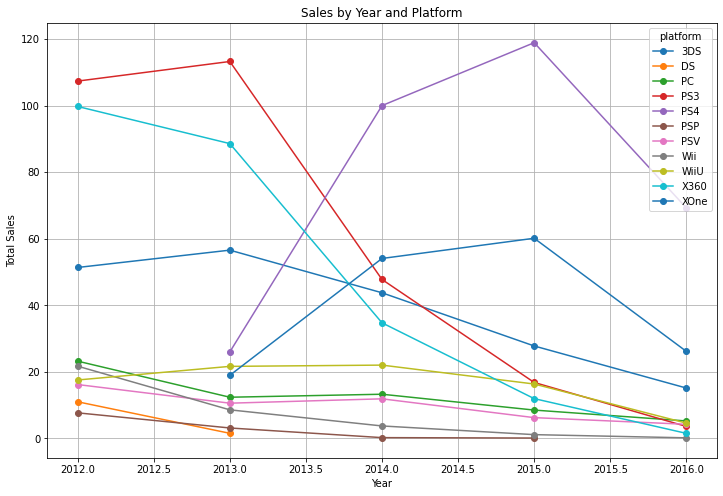

In [31]:
# Строим график
actual_platform_sales_by_year.plot(kind='line', figsize=(12, 8), marker='o', grid=True)
plt.title('Sales by Year and Platform')
plt.xlabel('Year')
plt.ylabel('Total Sales')

1.   Актуальный период как показало наше исследование, является период меньше 5 лет больше 2 полных лет. 
2.   Как видно из графика на 2016 год  все платформы на спаде рынок игр проседает. Топ 3 по продажам PS4, XboxOne, 3DS, они и являются потенциально прибыльными.
3. PC как самую долго живущую платформу тоже наверно нужно выделить, хотя продажи по ней не существенные. Наверняка по причине пиратства и взломов.


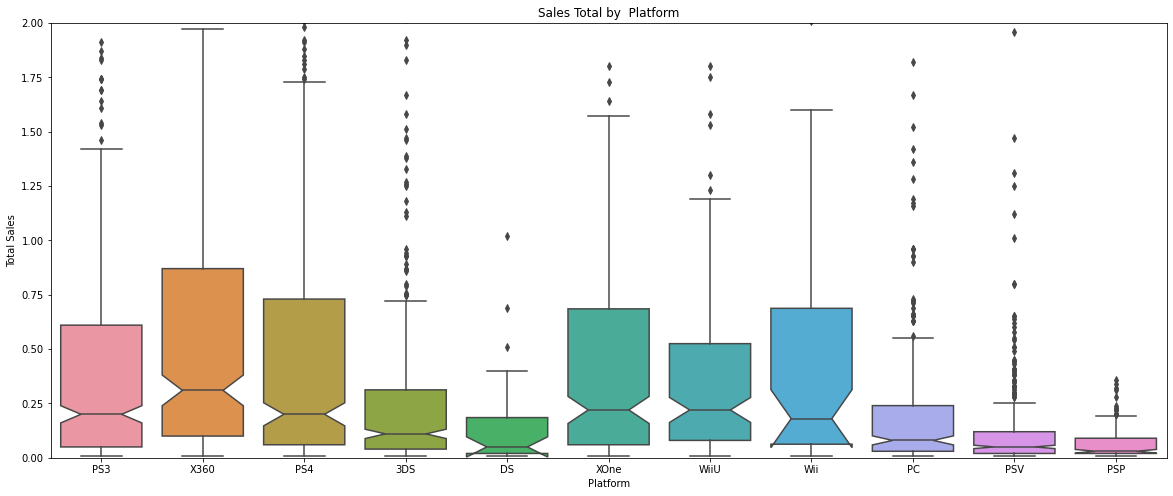

In [32]:
afig = plt.subplots(figsize=(20, 8))
sns.boxplot(data= actual_time, x='platform', y = 'sales_total', notch=True)
plt.ylim(0, 2)
plt.title('Sales Total by  Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.show()

In [33]:
actual_time.groupby('platform')['sales_total'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.0400,0.11,0.3125,14.60
DS,31.0,0.404839,1.439245,0.01,0.0200,0.05,0.1850,8.06
PC,250.0,0.250600,0.494640,0.01,0.0300,0.08,0.2400,5.14
PS3,493.0,0.585781,1.462855,0.01,0.0500,0.20,0.6100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
PSP,173.0,0.064682,0.071296,0.01,0.0200,0.03,0.0900,0.36
PSV,411.0,0.119659,0.203011,0.01,0.0200,0.05,0.1200,1.96
Wii,54.0,0.655000,1.165447,0.01,0.0625,0.18,0.6875,6.76
WiiU,147.0,0.559116,1.058836,0.01,0.0800,0.22,0.5250,7.09


* Наиболее успешно игры продаются на XBOX 360, PS4, PS3, XBOXONE.
* Заметно, что практически у всех платформ большая часть значений больше медианного
* Наверняка имеет влияние выпуски эксклюзивов для тех или иных платформ и они продаются более успешно.
* Тут нужно учесть и обратную совместимость на консоли XBOXONE можно играть и в игры которые были выпущены для XBOX360

In [34]:
# Комментарий ревьюера 2
print(len(actual_time.query("critic_score > 0")))
print(len(actual_time.query("user_score > 0")))
print(len(actual_time.query("critic_score > 0 and user_score > 0")))

1312
1531
1297


<AxesSubplot:xlabel='critic_score', ylabel='sales_total'>

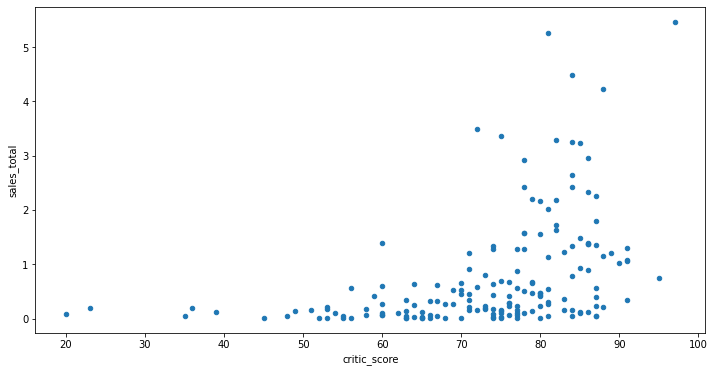

In [35]:
xbox_one = actual_time.query("platform == 'XOne' and critic_score > 0") # Вспоминаем что поэтим полям у нас индикаторное значение -1(заглушки)
xbox_one.plot(kind='scatter', x='critic_score', y='sales_total', figsize=(12,6))

Когда средний рейтинг от критиков возрастает, так же возрастают и  средние продажи игр. Чем качественнее игра по мнению критиков, тем больше прибыли она приносит и платформе и издателям.

<AxesSubplot:xlabel='user_score', ylabel='sales_total'>

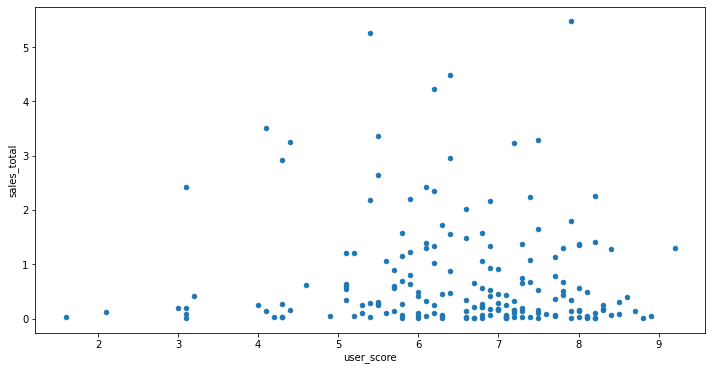

In [36]:
xbox_one = actual_time.query("platform == 'XOne' and user_score > 0")
xbox_one.plot(kind='scatter', x='user_score', y='sales_total', figsize=(12,6))

История с оценкой пользователями похожа. Но есть и выбросы когда рейтинг пользователей невелик, а игра хорошо продается.

<AxesSubplot:>

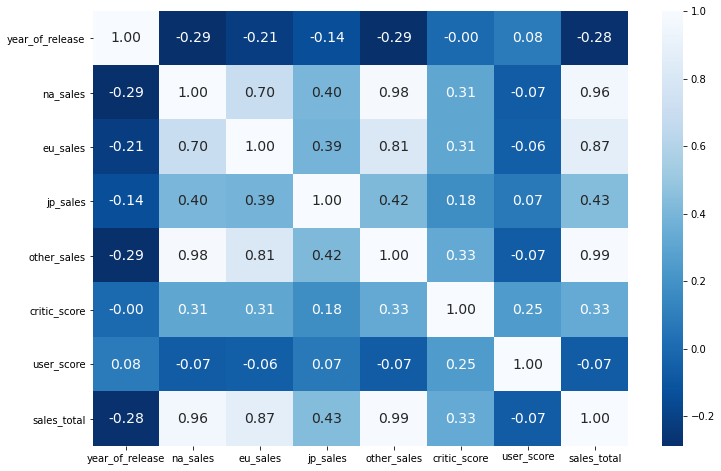

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(xbox_one.corr(), annot=True, cmap="Blues_r", fmt='.2f', annot_kws={'size':14})

Из графика корреляции видно, что оценка критиков с высокими продажами, а вот оценка пользователей практически не влияет на продажи(корреляция слабо отрицательная).

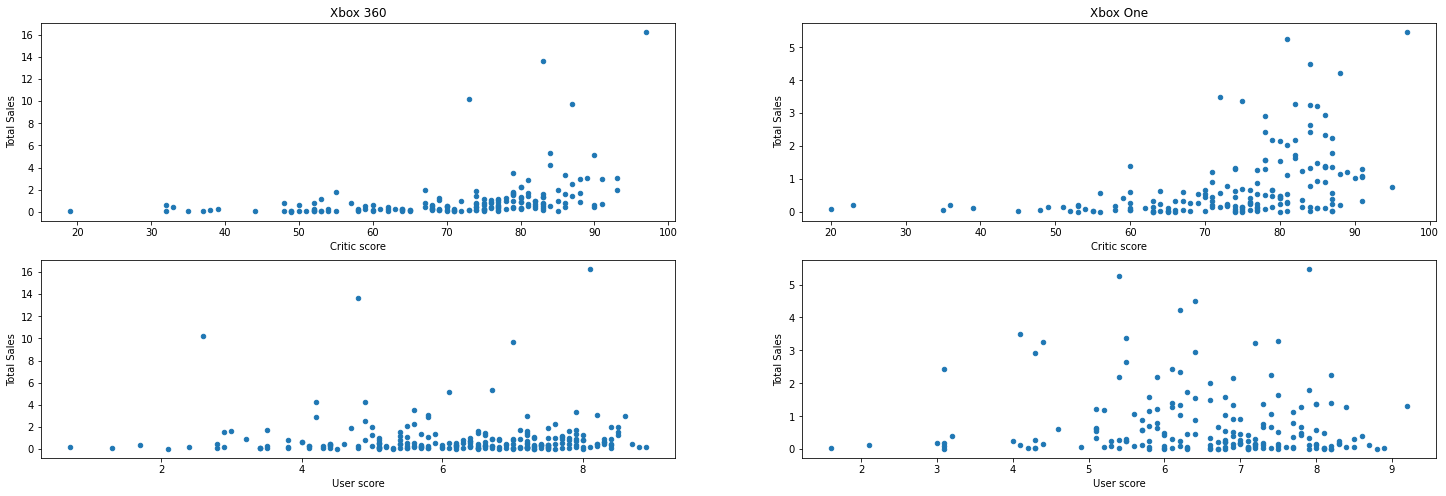

In [38]:
xbox_360_critic = actual_time.query("platform == 'X360' and critic_score > 0") 
xbox_360_user = actual_time.query("platform == 'X360' and user_score > 0")
xbox_one_critic = actual_time.query("platform == 'XOne' and critic_score > 0")
xbox_one_user = actual_time.query("platform == 'XOne' and user_score > 0")

fig, axs = plt.subplots(nrows= 2 , ncols= 2, figsize=(25,8))

xbox_360_critic.plot(kind='scatter', ax=axs[0,0], x='critic_score', y='sales_total')
axs[0,0].set_title('Xbox 360')
axs[0,0].set_ylabel('Total Sales')
axs[0,0].set_xlabel('Critic score')

xbox_360_user.plot(kind='scatter', ax=axs[1,0], x='user_score', y='sales_total')
axs[1,0].set_ylabel('Total Sales')
axs[1,0].set_xlabel('User score')

xbox_one_critic.plot(kind='scatter', ax=axs[0,1], x='critic_score', y='sales_total')
axs[0,1].set_title('Xbox One')
axs[0,1].set_ylabel('Total Sales')
axs[0,1].set_xlabel('Critic score')

xbox_one_user.plot(kind='scatter', ax=axs[1,1], x='user_score', y='sales_total')
axs[1,1].set_ylabel('Total Sales')
axs[1,1].set_xlabel('User score')
plt.show()

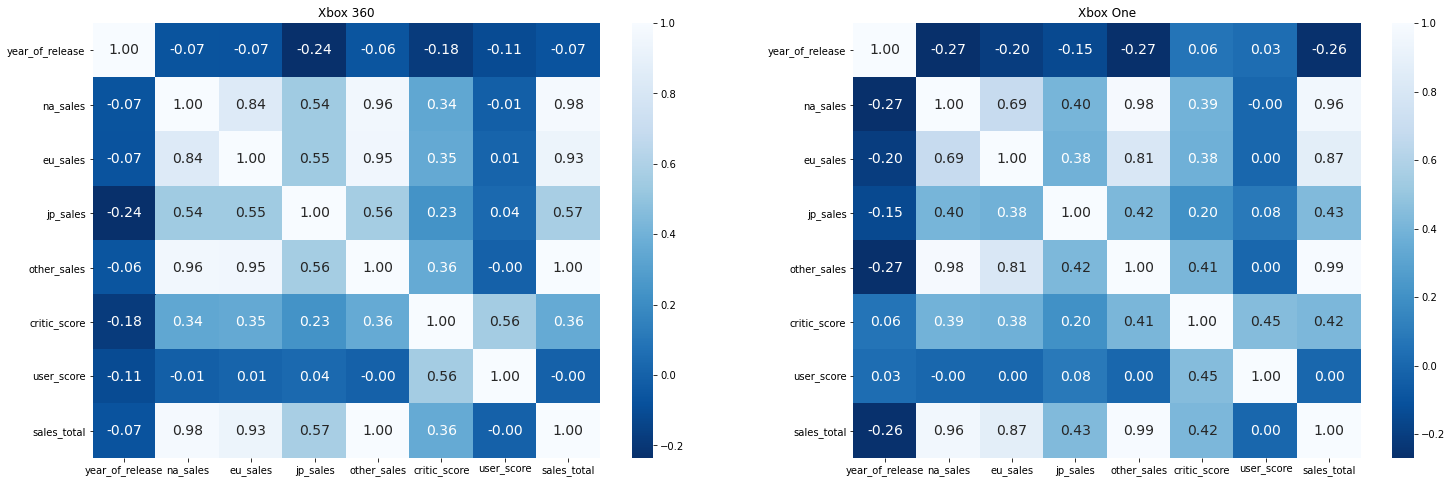

In [39]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize=(25, 8))

sns.heatmap(xbox_360_critic.corr(), ax = axs[0], annot=True, cmap="Blues_r", fmt='.2f', annot_kws={'size':14})
axs[0].set_title('Xbox 360')

sns.heatmap(xbox_one_critic.corr(), ax = axs[1], annot=True, cmap="Blues_r", fmt='.2f', annot_kws={'size':14})
axs[1].set_title('Xbox One')
plt.show()

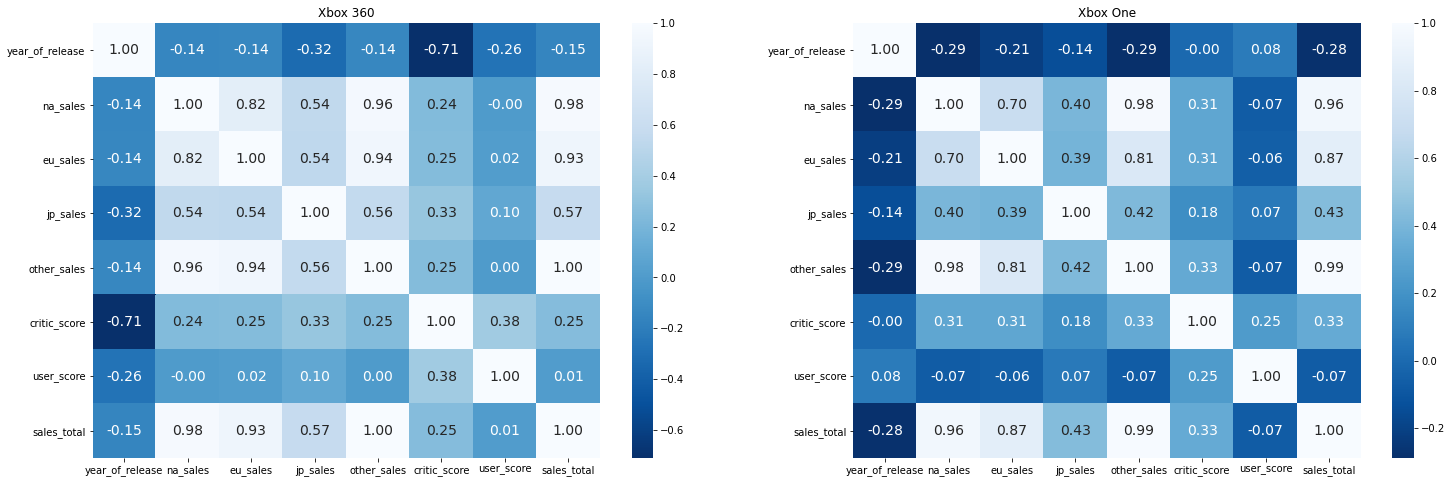

In [40]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize=(25, 8))

sns.heatmap(xbox_360_user.corr(), ax = axs[0], annot=True, cmap="Blues_r", fmt='.2f', annot_kws={'size':14})
axs[0].set_title('Xbox 360')

sns.heatmap(xbox_one_user.corr(), ax = axs[1], annot=True, cmap="Blues_r", fmt='.2f', annot_kws={'size':14})
axs[1].set_title('Xbox One')
plt.show()

* Из графиков видно что оцеки критиков влияют на продажи на обе прлатформы Xbox(что подтверждает корреляционный анализ)
* Оценка пользователями напротив около нулевая или слабо-отрицательная на любой из Xbox и с оценками user_score > 0 и с оценкой critic_score > 0.

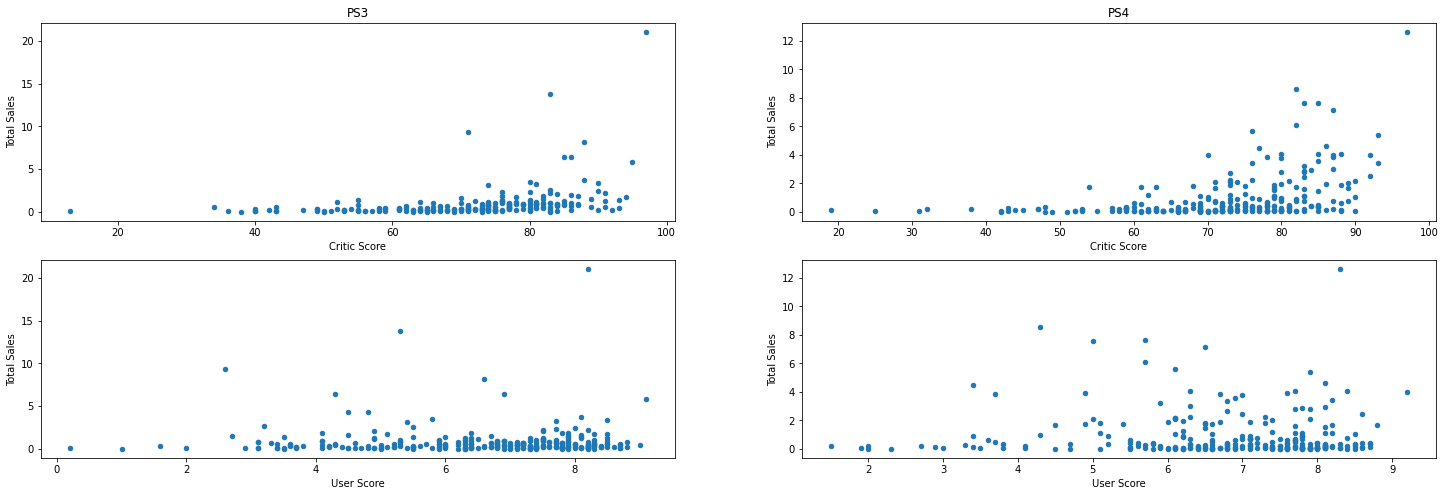

In [41]:
ps3_critic = actual_time.query("platform == 'PS3' and critic_score > 0") 
ps3_user = actual_time.query("platform == 'PS3' and user_score > 0")
ps4_critic = actual_time.query("platform == 'PS4' and critic_score > 0") 
ps4_user = actual_time.query("platform == 'PS4' and user_score > 0")

fig, axs = plt.subplots(nrows= 2 , ncols= 2, figsize=(25,8))

ps3_critic.plot(kind='scatter', ax=axs[0,0], x='critic_score', y='sales_total')
axs[0,0].set_title('PS3')
axs[0,0].set_ylabel('Total Sales')
axs[0,0].set_xlabel('Critic Score')

ps3_user.plot(kind='scatter', ax=axs[1,0], x='user_score', y='sales_total')
axs[1,0].set_ylabel('Total Sales')
axs[1,0].set_xlabel('User Score')

ps4_critic.plot(kind='scatter', ax=axs[0,1], x='critic_score', y='sales_total')
axs[0,1].set_title('PS4')
axs[0,1].set_ylabel('Total Sales')
axs[0,1].set_xlabel('Critic Score')

ps4_user.plot(kind='scatter', ax=axs[1,1], x='user_score', y='sales_total')
axs[1,1].set_ylabel('Total Sales')
axs[1,1].set_xlabel('User Score')
plt.show()

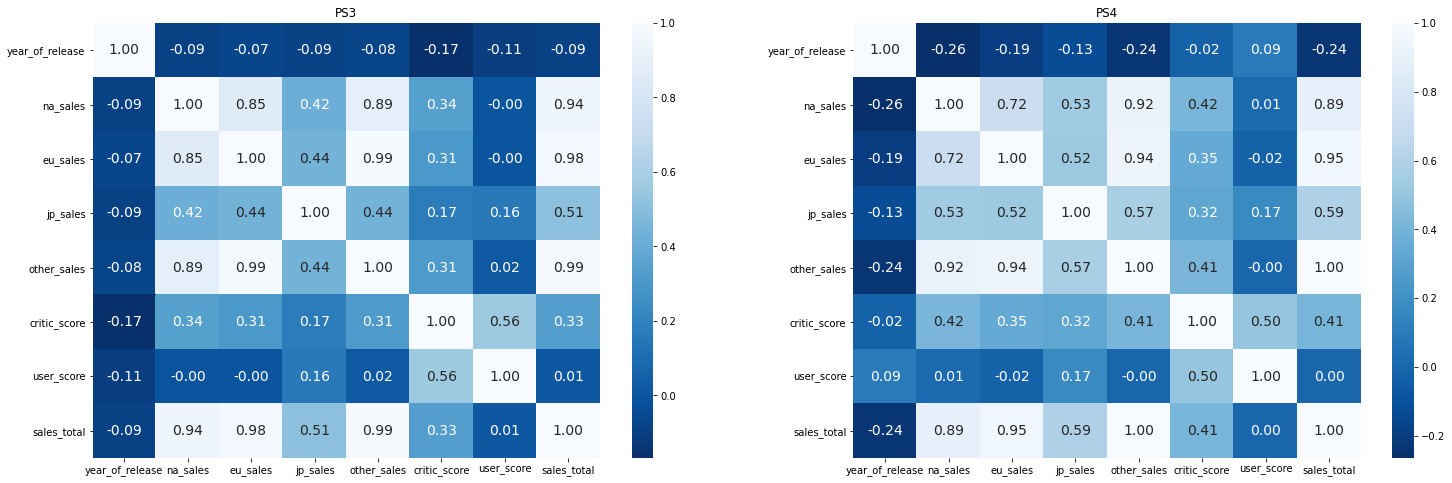

In [42]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize=(25, 8))

sns.heatmap(ps3_critic.corr(), ax = axs[0], annot=True, cmap="Blues_r", fmt='.2f', annot_kws={'size':14})
axs[0].set_title('PS3')

sns.heatmap(ps4_critic.corr(), ax = axs[1], annot=True, cmap="Blues_r", fmt='.2f', annot_kws={'size':14})
axs[1].set_title('PS4')
plt.show()

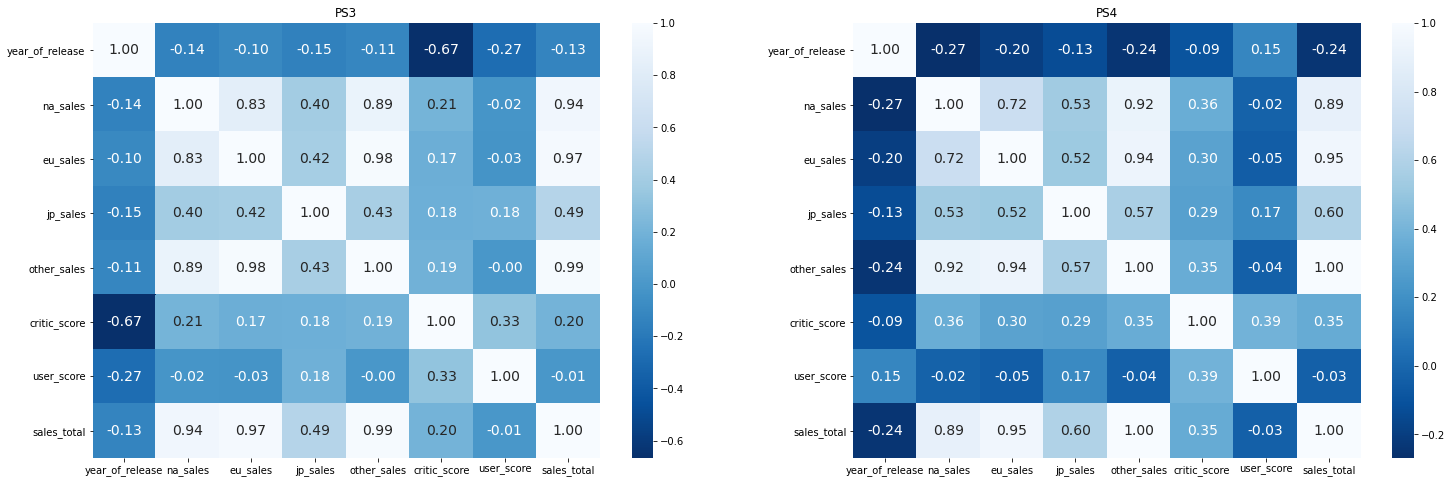

In [43]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize=(25, 8))

sns.heatmap(ps3_user.corr(), ax = axs[0], annot=True, cmap="Blues_r", fmt='.2f', annot_kws={'size':14})
axs[0].set_title('PS3')

sns.heatmap(ps4_user.corr(), ax = axs[1], annot=True, cmap="Blues_r", fmt='.2f', annot_kws={'size':14})
axs[1].set_title('PS4')
plt.show()

* Аналогичная ситуация и на платформах PlayStation 3 или 4
* Оценка критиками имеет влияние.
* Оценка пользователями нулевая или слабо-отрицательная.

👉 Здесь попробую зайти на original made in Japan

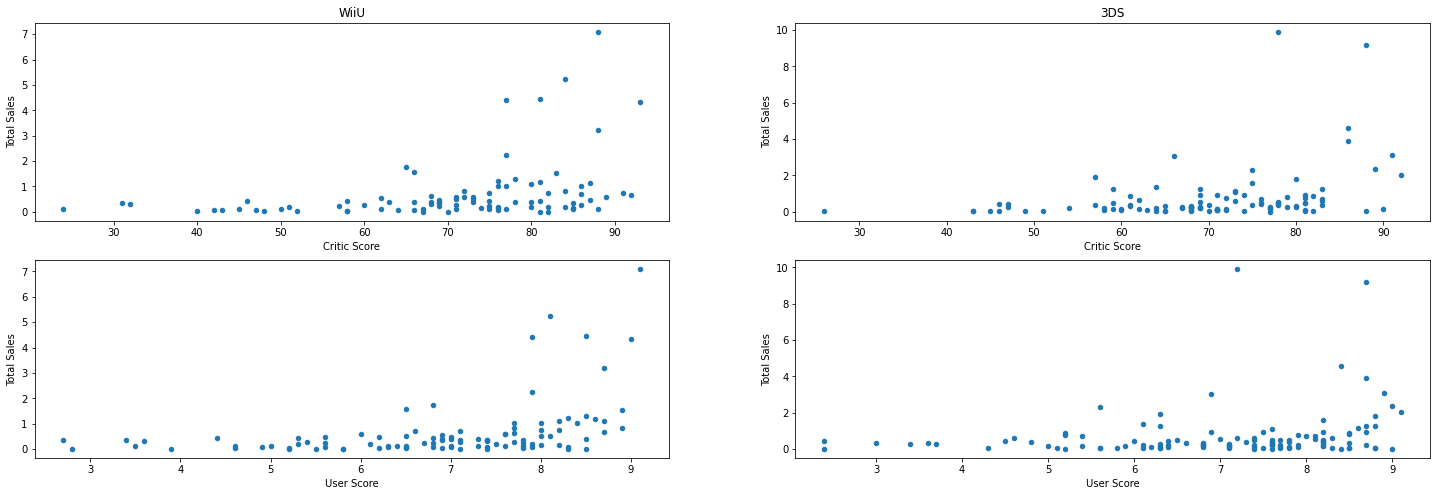

In [44]:
wiiu_critic = actual_time.query("platform == 'WiiU' and critic_score > 0") 
wiiu_user = actual_time.query("platform == 'WiiU' and user_score > 0")
ds3_critic = actual_time.query("platform == '3DS' and critic_score > 0") 
ds3_user = actual_time.query("platform == '3DS' and user_score > 0")

fig, axs = plt.subplots(nrows= 2 , ncols= 2, figsize=(25,8))

wiiu_critic.plot(kind='scatter', ax=axs[0,0], x='critic_score', y='sales_total')
axs[0,0].set_title('WiiU')
axs[0,0].set_ylabel('Total Sales')
axs[0,0].set_xlabel('Critic Score')

wiiu_user.plot(kind='scatter', ax=axs[1,0], x='user_score', y='sales_total')
axs[1,0].set_ylabel('Total Sales')
axs[1,0].set_xlabel('User Score')

ds3_critic.plot(kind='scatter', ax=axs[0,1], x='critic_score', y='sales_total')
axs[0,1].set_title('3DS')
axs[0,1].set_ylabel('Total Sales')
axs[0,1].set_xlabel('Critic Score')

ds3_user.plot(kind='scatter', ax=axs[1,1], x='user_score', y='sales_total')
axs[1,1].set_ylabel('Total Sales')
axs[1,1].set_xlabel('User Score')
plt.show()

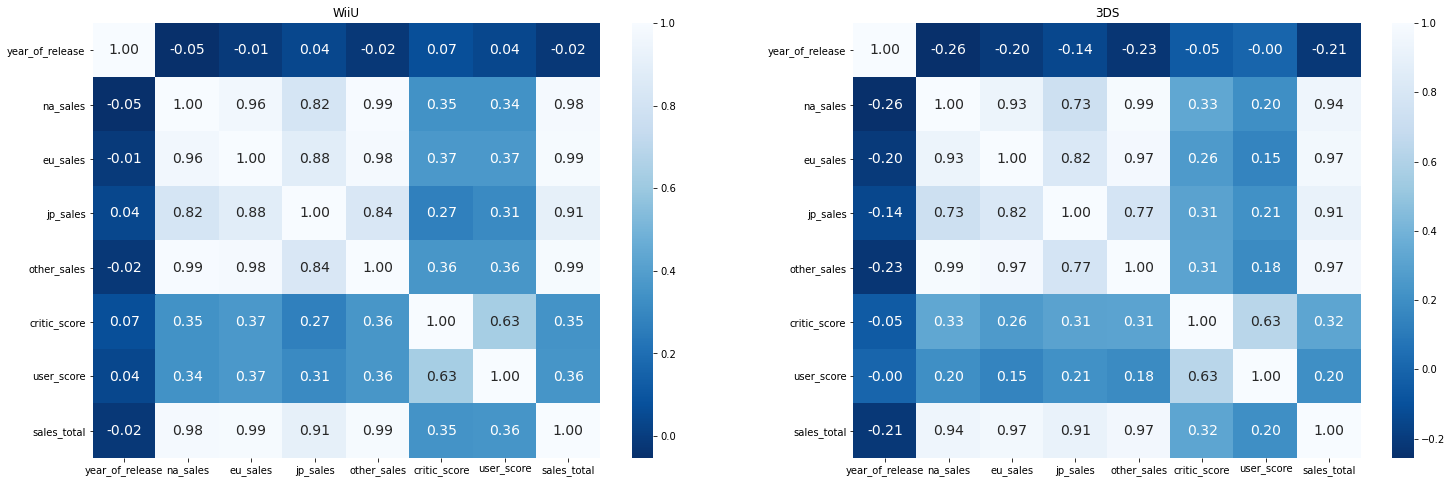

In [45]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize=(25, 8))

sns.heatmap(wiiu_critic.corr(), ax = axs[0], annot=True, cmap="Blues_r", fmt='.2f', annot_kws={'size':14})
axs[0].set_title('WiiU')

sns.heatmap(ds3_critic.corr(), ax = axs[1], annot=True, cmap="Blues_r", fmt='.2f', annot_kws={'size':14})
axs[1].set_title('3DS')
plt.show()

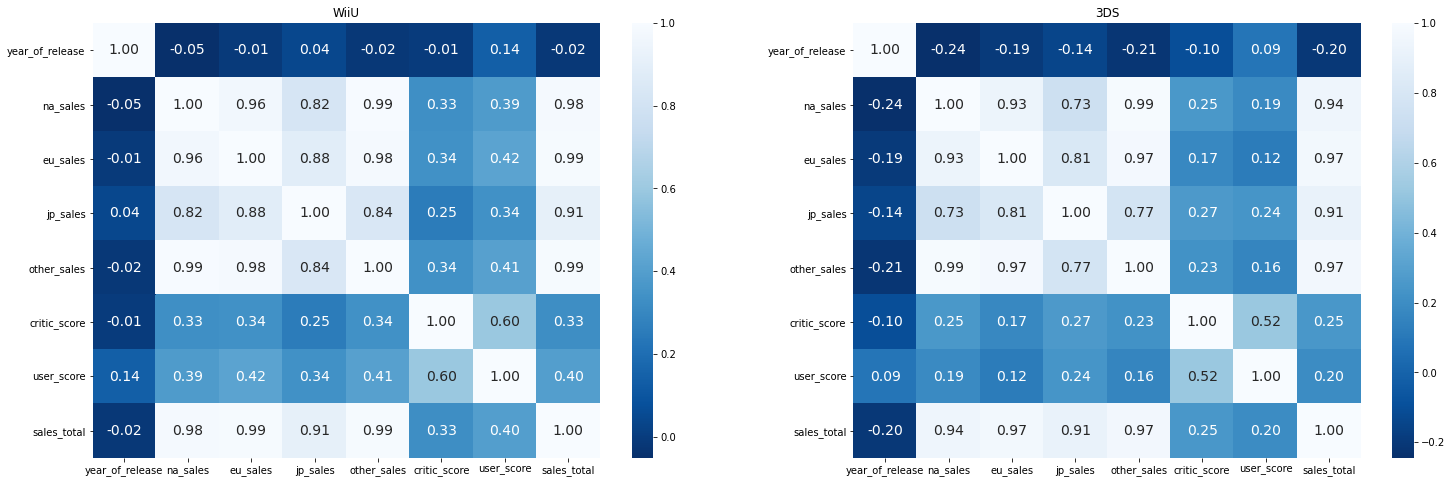

In [46]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize=(25, 8))

sns.heatmap(wiiu_user.corr(), ax = axs[0], annot=True, cmap="Blues_r", fmt='.2f', annot_kws={'size':14})
axs[0].set_title('WiiU')

sns.heatmap(ds3_user.corr(), ax = axs[1], annot=True, cmap="Blues_r", fmt='.2f', annot_kws={'size':14})
axs[1].set_title('3DS')
plt.show()

А вот с этими платформами нет таких результатов.Какие были выгше.
* WiiU и оценка критиками и оценка пользователями имеют влияние на продажи, и как видно оценка пользователями даже немного больше.
* В 3DS как критики так и пользователи влияют на продажи.

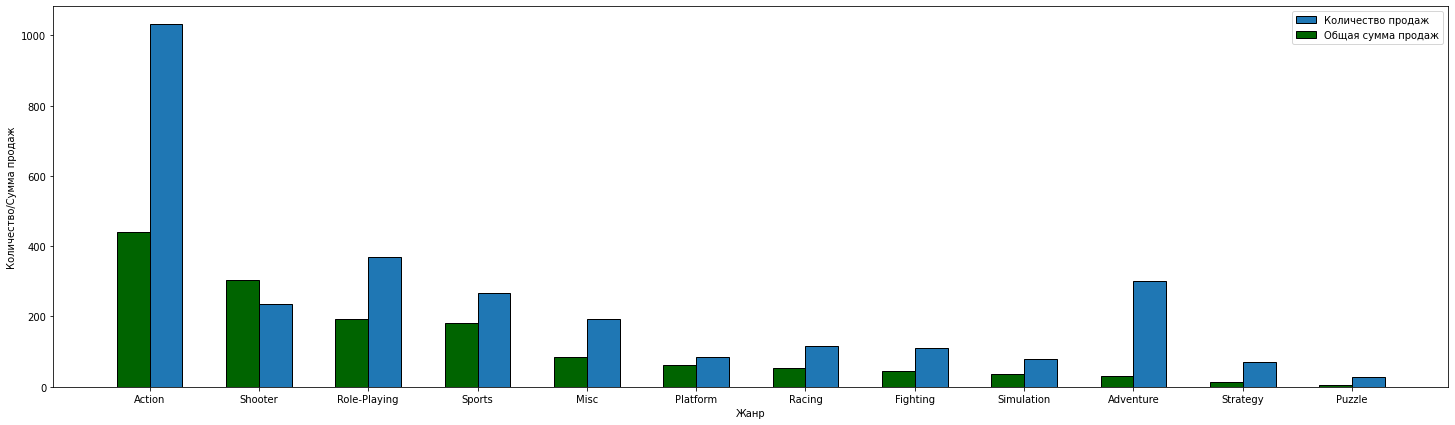

In [47]:
genre_pivot = actual_time.groupby('genre').agg({'name': 'count', 'sales_total': 'sum'}).sort_values(by='sales_total', ascending=False)

fig, ax = plt.subplots(figsize=(25, 7))
ax.bar(genre_pivot.index, genre_pivot['name'], width=0.3, align='edge', edgecolor='black')
ax.bar(genre_pivot.index, genre_pivot['sales_total'], width=-0.3, align='edge', edgecolor='black', color='darkgreen')

ax.set_xlabel('Жанр')
ax.set_ylabel('Количество/Сумма продаж')
ax.legend(['Количество продаж', 'Общая сумма продаж'])
plt.show()

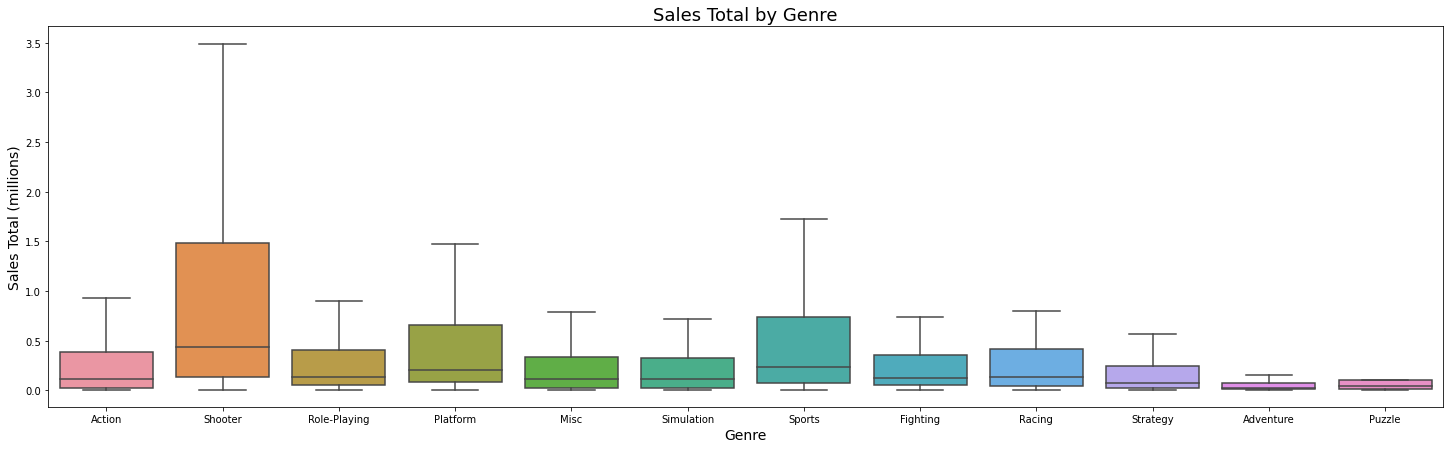

In [48]:
fig, ax = plt.subplots(figsize=(25,7))
sns.boxplot(data=actual_time, x='genre', y='sales_total', ax=ax, showfliers=False)
ax.set_title('Sales Total by Genre', fontsize=18)
ax.set_xlabel('Genre', fontsize=14)
ax.set_ylabel('Sales Total (millions)', fontsize=14)
plt.show()

In [49]:
actual_time.groupby('genre')['sales_total'].describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Shooter,235.0,1.296723,2.251662,0.01,0.135,0.440,1.4800,14.63
Platform,85.0,0.717647,1.364413,0.01,0.090,0.210,0.6600,9.90
Sports,268.0,0.675634,1.136378,0.01,0.080,0.240,0.7425,8.58
Role-Playing,370.0,0.521081,1.315937,0.01,0.060,0.140,0.4075,14.60
Racing,115.0,0.465217,0.888664,0.01,0.050,0.140,0.4200,7.09
Misc,192.0,0.442917,1.081047,0.01,0.030,0.120,0.3375,9.18
Simulation,80.0,0.439000,1.244500,0.01,0.030,0.120,0.3275,9.17
Action,1031.0,0.427856,1.166504,0.01,0.030,0.120,0.3900,21.05
Fighting,109.0,0.408165,0.910385,0.01,0.060,0.130,0.3600,7.55


Shooter, Platform, Sports, Role-Plaing, Racing,   входят в первую пятерку по медианным продажам по всем платформам. 
Это и есть жанры которые продаются стабильно на всех платформах.

**Вывод:**

* Быстрый рост выпуска игр начинается с 1994. Пик на консольные и компьютерные игры приходится на 2008-2009 года, далее начинается спад.

* Самые популярные игровые платформы за все время: PS, DS, WII, PS3, X360, PS2. Практически все игровые платформы в среднем существуют около 10 лет. Самый пик выхода игр наступает примерно в середине жизни приставки. PC самая долгоживущая платформа. Актуальный период для прогноза на 2017 взяли с 2012 по 2016 год. Данный период выбран в связи с тем, что уже остались только актуальные платформы и за 2016 год данные неполные.

* Из полученных данных мы видим, что в топе продаж приставки PS4 и XONE. По данным видно, что практически все платформы находятся в стадии снижения показателей. Потенциально прибыльными платформами будем считать: PS4, XONE, 3DS.

* Заметно, что практически у всех платформ большая часть значений больше медианного. У платформ XONE, X360, WIIU, WII, PS4 медиана находится в районе значения 0.2. Наиболее длинный ряд успешно продающихся игр у PS4 и XONE, следом WIIU.
* Выяснили  что оценка критиками имеет роль в продажах(но не на всех платформах одинаково). А вот оценка пользователями практически не влияет на продажи в Америке и Европе, а в Японии отзывы пользователей имееют влияние на продажи.
* По медианным продажам Shooter, Platform, Sports, Role-Plaing, Racing, входят в первую пятерку по продажам, по всем платформам. Это и есть жанры которые продаются стабильно на всех платформах.

## 4. Портрет пользователя регионов NA, EU, JP

**Определите для пользователя каждого региона (NA, EU, JP):**
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [50]:
# Создаем таблицы по регионам
top_na = actual_time.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()
top_eu = actual_time.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()
top_jp = actual_time.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()

<AxesSubplot:title={'center':'Japan Sales'}, xlabel='platform'>

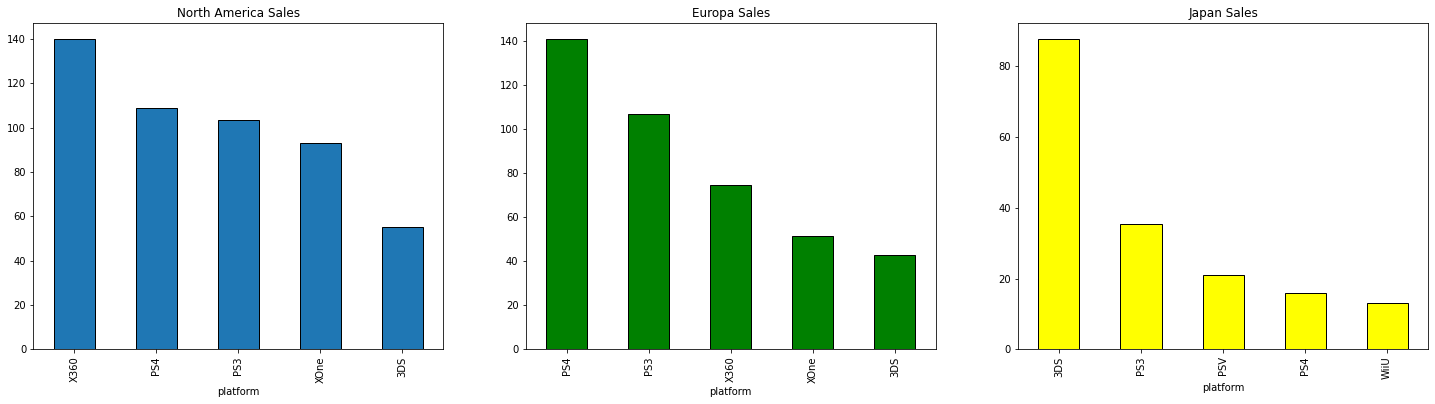

In [51]:
# Строим графики
fig, axs = plt.subplots(nrows= 1 , ncols= 3, figsize=(25,6))
top_na.plot(kind='bar', ax = axs[0], title='North America Sales', ec='black')
top_eu.plot(kind='bar', ax = axs[1], title='Europa Sales', color='green', ec='black')
top_jp.plot(kind='bar', ax = axs[2], title='Japan Sales', color='yellow', ec='black')

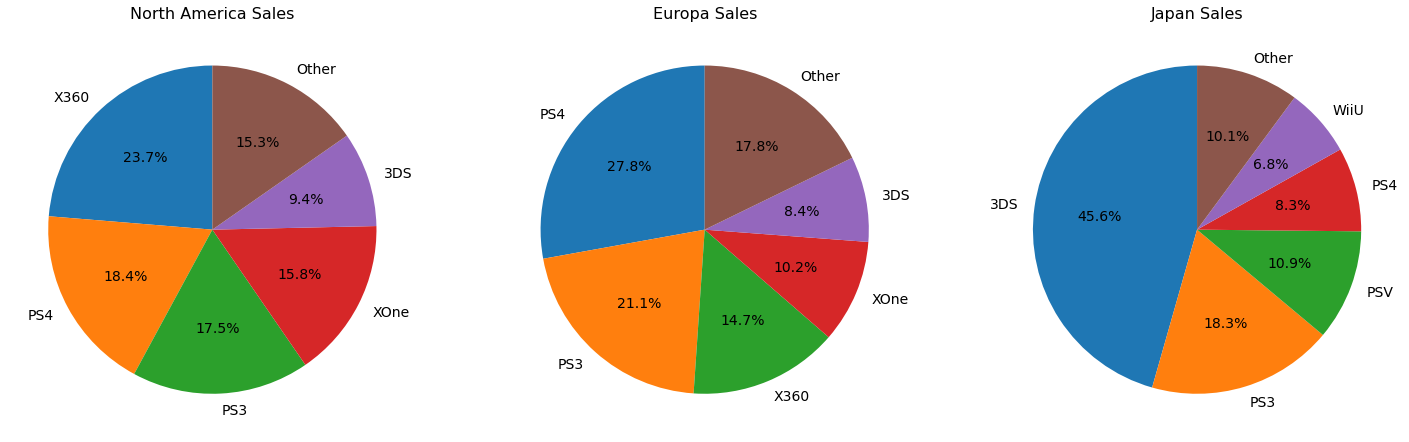

In [52]:
# создаем серию, содержащую только топ 5
top_na_ = actual_time.groupby('platform')['na_sales'].sum().sort_values(ascending=False)[:5]
top_eu_ = actual_time.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)[:5]
top_jp_ = actual_time.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)[:5]

# создаем серию, содержащую все остальные платформы
other_na = actual_time.groupby('platform')['na_sales'].sum().sort_values(ascending=False)[5:].sum()
other_eu = actual_time.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)[5:].sum()
other_jp = actual_time.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)[5:].sum()

# создаем новую серию, объединяя топ 5 и "Другие"
top_na_other = top_na_.append(pd.Series(other_na, index=['Other']))
top_eu_other = top_eu_.append(pd.Series(other_eu, index=['Other']))
top_jp_other = top_jp_.append(pd.Series(other_jp, index=['Other']))

# создаем фигуру с 3 диаграммами
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 8))

# Строим круговые диаграммы для каждого региона
top_na_other.plot(kind='pie', ax=axs[0], autopct='%1.1f%%', startangle=90, fontsize=14)
top_eu_other.plot(kind='pie', ax=axs[1], autopct='%1.1f%%', startangle=90, fontsize=14)
top_jp_other.plot(kind='pie', ax=axs[2], autopct='%1.1f%%', startangle=90, fontsize=14)

# Добавляем заголовки к графикам
axs[0].set_title('North America Sales', fontsize=16)
axs[1].set_title('Europa Sales', fontsize=16)
axs[2].set_title('Japan Sales', fontsize=16)

# Убираем подпись None на оси y у всех графиков
axs[0].set_ylabel('')
axs[1].set_ylabel('')
axs[2].set_ylabel('')
plt.show()

* В Северной Америке самая топовая платформа X360, чуть-чуть отстает PS4, затем  PS3, XboxOne и замыкает пятерку 3DS.Америка любит Xbox.
* В Европе же лидируют PS4 и PS3 потом X360, XboxOne и замыкает пятерку тоже 3DS. Европейцы любят PlayStation.
* В Японии, как обычно, всё наоборот. Лидер - 3DS. За ними PS3 и PSV и замыкает PS4. . Япония любит только свои продукты и в Xbox играют мало)).

In [53]:
# Создаем таблицы по регионам
na_genre = actual_time.groupby('genre').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False).head()
eu_genre = actual_time.groupby('genre').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False).head()
jp_genre = actual_time.groupby('genre').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False).head()

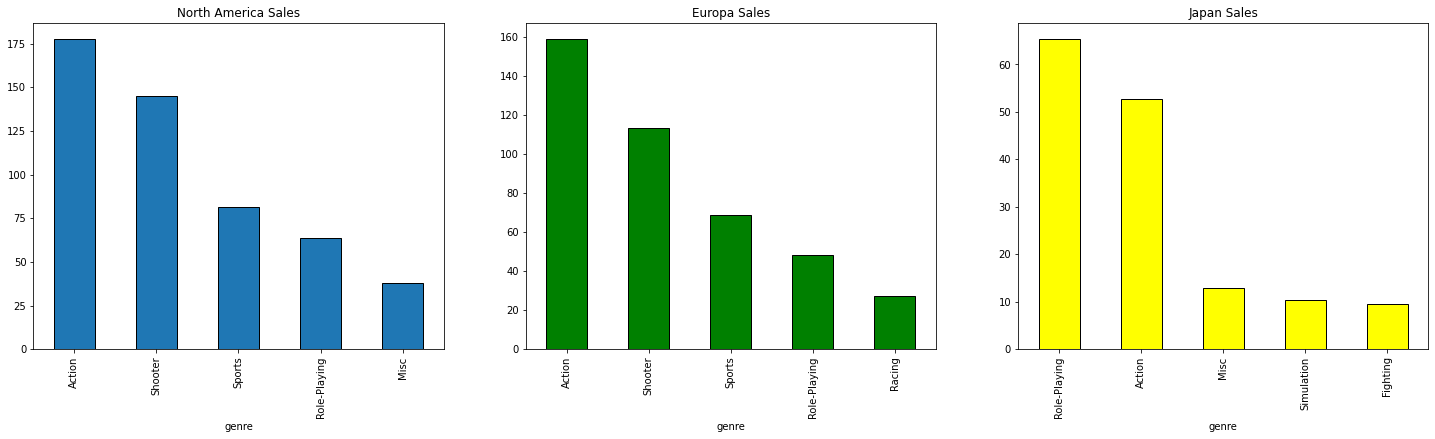

In [54]:
# Строим графики
fig, axs = plt.subplots(nrows= 1 , ncols= 3, figsize=(25,6))
na_genre.plot(kind='bar', ax = axs[0], title='North America Sales', ec='black', legend=False)
eu_genre.plot(kind='bar', ax = axs[1], title='Europa Sales', color='green', ec='black', legend=False)
jp_genre.plot(kind='bar', ax = axs[2], title='Japan Sales', color='yellow', ec='black', legend=False)
plt.show()

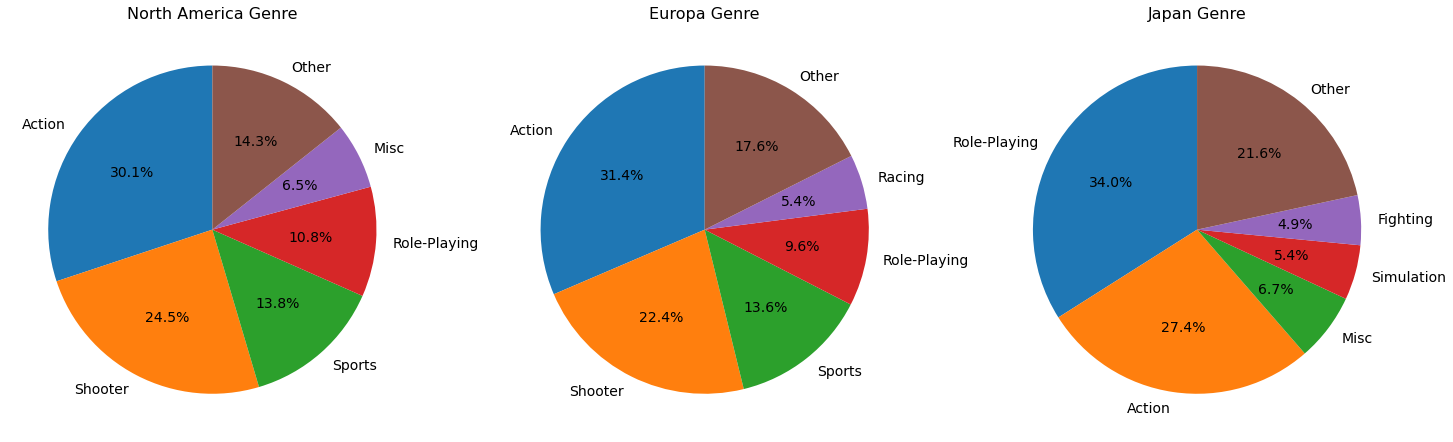

In [55]:
# создаем серию, содержащую только топ 5
na_genre_ = actual_time.groupby('genre')['na_sales'].sum().sort_values(ascending=False)[:5]
eu_genre_ = actual_time.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)[:5]
jp_genre_ = actual_time.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)[:5]

# создаем серию, содержащую все остальные платформы
other_na_genre = actual_time.groupby('genre')['na_sales'].sum().sort_values(ascending=False)[5:].sum()
other_eu_genre = actual_time.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)[5:].sum()
other_jp_genre = actual_time.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)[5:].sum()

# создаем новую серию, объединяя топ 5 и "Другие"
na_genre_other = na_genre_.append(pd.Series(other_na_genre, index=['Other']))
eu_genre_other = eu_genre_.append(pd.Series(other_eu_genre, index=['Other']))
jp_genre_other = jp_genre_.append(pd.Series(other_jp_genre, index=['Other']))

# создаем фигуру с 3 диаграммами
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 8))

# Строим круговые диаграммы для каждого региона
na_genre_other.plot(kind='pie', ax=axs[0], autopct='%1.1f%%', startangle=90, fontsize=14)
eu_genre_other.plot(kind='pie', ax=axs[1], autopct='%1.1f%%', startangle=90, fontsize=14)
jp_genre_other.plot(kind='pie', ax=axs[2], autopct='%1.1f%%', startangle=90, fontsize=14)

# Добавляем заголовки к графикам
axs[0].set_title('North America Genre', fontsize=16)
axs[1].set_title('Europa Genre', fontsize=16)
axs[2].set_title('Japan Genre', fontsize=16)

# Убираем подпись None на оси y у всех графиков
axs[0].set_ylabel('')
axs[1].set_ylabel('')
axs[2].set_ylabel('')
plt.show()

* Вкусы в Северной Америке и Европе схожи: и там, и там живут фанаты экшенов, спортивных игр и шутеров.На 4 месте ролевые игры. В Северной Америке больше играют в платформеры, в Европе же чаще выбирают гонки.


* В Японии вкус совершенно иной - на первом месте ролевые игры, причем с большим отрывом. Далее экшены.Миксы и симуляторы.

In [56]:
# Создаем таблицы по регионам
na_rating = actual_time.groupby('rating').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False).head()
eu_rating = actual_time.groupby('rating').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False).head()
jp_rating = actual_time.groupby('rating').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False).head()

<AxesSubplot:title={'center':'Japan Sales'}, xlabel='rating'>

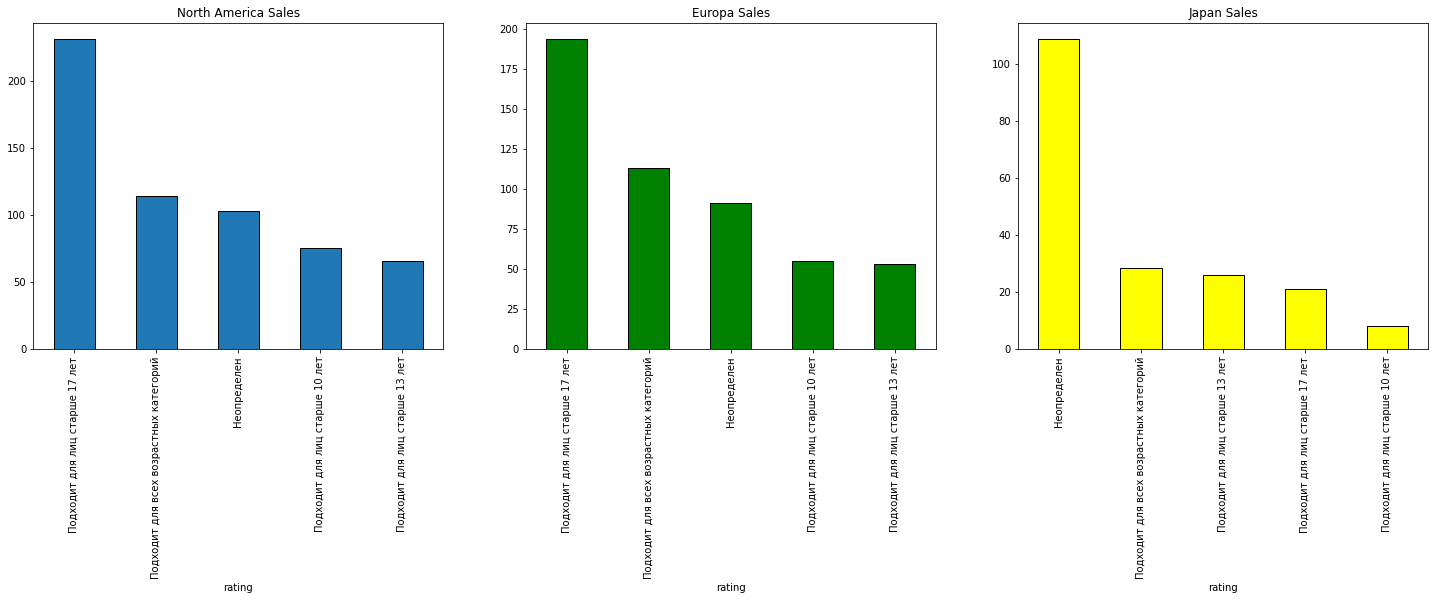

In [57]:
# Строим графики
fig, axs = plt.subplots(nrows= 1 , ncols= 3, figsize=(25,6))
na_rating.plot(kind='bar', ax = axs[0], title='North America Sales', ec='black', legend=False)
eu_rating.plot(kind='bar', ax = axs[1], title='Europa Sales', color='green', ec='black', legend=False)
jp_rating.plot(kind='bar', ax = axs[2], title='Japan Sales', color='yellow', ec='black', legend=False)

* В Америке и Европе ситуация похожая вернее идентичная. На первом месте старше 17 лет. И на втором месте игры для всех и потом с неопределённым рейтингом.(там где у нас был NaN).
* В Японии игры с не определённым рейтингом на первом месте. Но они играют на своих приставках в своих жанрах, вероятно они не присваивают рейтинги ESRB. Возможно у них, какие-то свои рейтинги.

## 5. Проверка гипотез

### **Гипотезы:**

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. Средние пользовательские рейтинги жанров Action и Sports разные.

**Для проверки обеих гипотез будем использовать t-критерий Стьюдента, т.к. в обоих случаях выборки независимы между собой.
Определим пороговое значение alpha = 0.05**



1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

* Н0 (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* Н1 (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

In [58]:
xbox_one = actual_time.query("platform == 'XOne' and user_score > 0")['user_score']
pc = actual_time.query("platform == 'PC' and user_score > 0")['user_score']

In [59]:
# Комментарий ревьюера
xbox_one.min(), pc.min()

(1.6, 1.4)

In [60]:
results = st.ttest_ind(xbox_one, pc)

In [61]:
alpha = 0.05

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


**Вывод:**
Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC одинаковые.


2. Средние пользовательские рейтинги жанров Action и Sports разные.
* H0: средние пользовательские рейтинги жанров Action и Sports отличаются между собой. 
* H1: средние пользовательские рейтинги жанров Action и Sports одинаковые.

In [62]:
action_genre = actual_time.query("genre == 'Action' and user_score > 0")['user_score']
sports_genre = actual_time.query("genre == 'Sports' and user_score > 0")['user_score']

In [63]:
results = st.ttest_ind(action_genre, sports_genre)

In [64]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


**Вывод:** Средние пользовательские рейтинги жанров Action и Sports одинаковые.

## 6. Общий вывод
* Перед анализом данных, мы провели предобработку данных: привели к нижнему регистру имена столбцов, к правильным типам данных необходимые столбцы. Удалили пропуски в столбцах. Проверили на дубликаты.
* Определили, что аббревиатура TBD значит to be determined. Поэтому заменили tbd на nan для проведения дальнейшего анализа.
* Проведя анализ, мы выявили, что быстрый рост выпуска игр начинается с 1994. Пик на консольные и компьютерный игры приходится на 2008-2009 года, далее начинается спад.Самые популярные игровые платформы за все время: PS, DS, WII, PS3, X360, PS2. Практически все игровые платформы в среднем существуют около 10 лет. Самый пик выхода игр наступает примерно в середине жизни пплатформы. PC самая долгоживущая платформа. Актуальный период для прогноза на 2017 взяли с 2012 по 2016 года. Данный период выбран в связи с тем, что уже остались только актуальные платформы. 
* По данным видно, что практически все платформы находятся в стадии снижения показателей. Потенциально прибыльными платформами будем считать: PS4, XONE.
* Оцека критиками и оценка пользователями не одно и тоже. Если оценка критиками имеет влияние на продажи на всех рынках продаж , то пользовательские оценки не  влияют в Европе и Америке, а в Японии влияние имеют.
* И выяснили рынки Америки и Европы схожи , а вот рынок Японии в некотором смысле уникален, со своими рейтингами, жанрами, платформами. И к нему нужны другие подходы.


**Рекомендации:**
1. Планируя рекламную кампанию на 2017 год стоит обратить особое внимание на продвижение платформы PS4 , а также платформ XONE , в жанре Sports, Shooter с рекламой в Америке и Европе.С рейтингом ESRB 'Подходит для лиц старше 17 лет' или 'Подходит для всех возрастных категорий'.
2. Стоит также не забывать об особенностях рынка и подстроить рекламу конкретно под него. На примере Японии показано, как требования потребителей одной страны могут отличаться от предпочтений основной массы пользователей.
